In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os
import numpy as np
import cv2


class Data:

  def __init__(self,zip_dir,out_dir):
    super().__init__()
    self.path_folder = out_dir
    self.sub_folder = None
    self.All_img = None
    self.unzip(zip_dir)
    direct = zip_dir.split('/')
    # print(direct)
    self.zip_name = direct[-1].split('.')[0]
    # print(zip_name)
    self.load()

  def unzip(self,Path):
   zip_file_path = f'{Path}'
   with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(self.path_folder)


  def load(self):
    path = f'{self.path_folder}{self.zip_name}/images'
    self.data = []
    a = os.listdir(path)
    for i in a:
      b = os.listdir(f'{path}/' + i)
      for j in b:
        self.data.append(f'{path}/' + i + '/' + j)


  def read(self,n):
    images = []
    for i in range(n):
     img = cv2.imread(self.data[i])
     img = self.preprocess(img)
     images.append(img)
    images = np.array(images)
    return images

  def preprocess(self,image):
    #normalize
    pixels = image.astype('float32')
    pixels /= 255.0
    #resize
    img_normalized = cv2.resize(pixels,(1024,1024))

    return img_normalized


In [ ]:
#Unzip , load , read folders

path_train = '/content/drive/MyDrive/WIDER dataset/WIDER_train.zip'
path_val = '/content/drive/MyDrive/WIDER dataset/WIDER_val.zip'
path_test = '/content/drive/MyDrive/WIDER dataset/WIDER_test.zip'
output = '/content/'

train_dataset = Data(path_train,output)
val_dataset = Data(path_val,output)
test_dataset = Data(path_test,output)

# train = train_dataset.read(10)
# val = val_dataset.read(1)
# test = test_dataset.read(1)

In [ ]:
# Remove all folder
!rm -R WIDER_train/
!rm -R WIDER_test/
!rm -R WIDER_val/

## Try 3

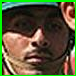

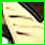

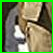

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load some pre-trained data on face frontal from opencv (haar cascade algorithm)
# trained_face_data = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
trained_face_data = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Choose an image to detect faces in
img = cv2.imread('/content/WIDER_train/images/0--Parade/0_Parade_Parade_0_1019.jpg')

# Must convert to greyscale
grayscaled_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect Faces
face_coordinates = trained_face_data.detectMultiScale(grayscaled_img)

img_crop = []

# Draw rectangles around the faces
for (x, y, w, h) in face_coordinates:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    img_crop.append(img[y:y + h, x:x + w])

for counter, cropped in enumerate(img_crop):
    cv2_imshow(cropped)
    cv2.imwrite("pose_result_{}.png".format(counter), cropped)
    cv2.waitKey(0)